In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
import zipfile

In [6]:
from zipfile import ZipFile
file_name = "/content/PotatoDisease.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
with zipfile.ZipFile(file_name, 'r') as zip:
       zip.extractall()
       print('Done')

Done


In [8]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1500 files belonging to 3 classes.


In [11]:
class_names = dataset.class_names
class_names

['Test', 'Train', 'Valid']

In [12]:
len(dataset)

47

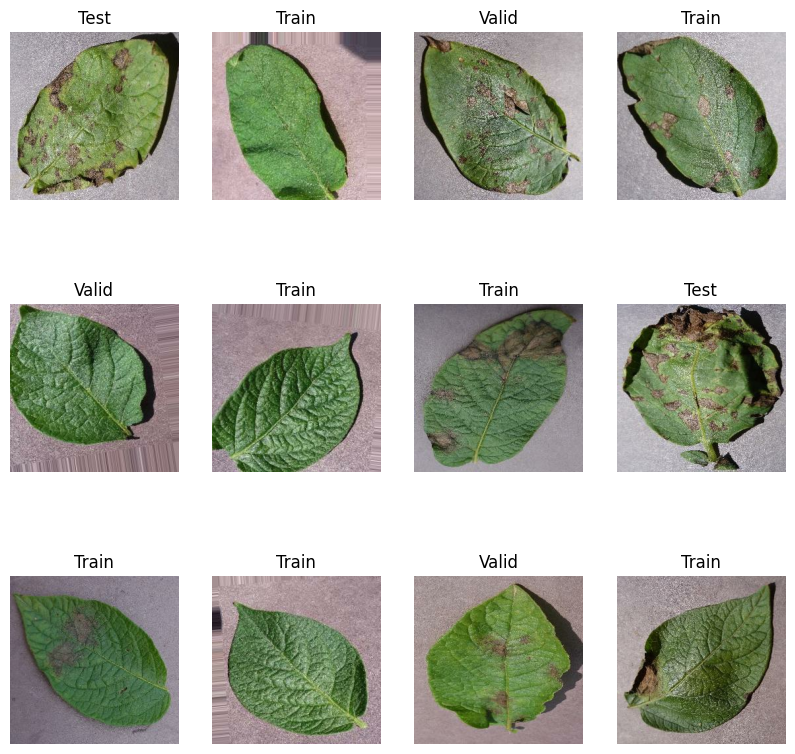

In [13]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [14]:
len(dataset)

47

In [15]:
train_size = 0.8
len(dataset)*train_size

37.6

In [16]:
train_ds = dataset.take(54)
len(train_ds)

47

In [17]:
test_ds = dataset.skip(54)
len(test_ds)

0

In [18]:
val_size = 0.1
len(dataset)*val_size

4.7

In [19]:
val_ds = test_ds.take(6)
len(val_ds)

0

In [20]:
test_ds = test_ds.skip(6)
len(test_ds)

0

In [21]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [23]:
len(train_ds)

37

In [24]:
len(val_ds)

4

In [25]:
len(test_ds)

6

In [26]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [28]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [29]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)


In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
37/37 [==============================] - 15s 166ms/step - loss: 0.9852 - accuracy: 0.5822 - val_loss: 0.8931 - val_accuracy: 0.6406
Epoch 2/50
37/37 [==============================] - 4s 63ms/step - loss: 0.9555 - accuracy: 0.6005 - val_loss: 0.9329 - val_accuracy: 0.6406
Epoch 3/50
37/37 [==============================] - 4s 64ms/step - loss: 0.9617 - accuracy: 0.5941 - val_loss: 0.9313 - val_accuracy: 0.6406
Epoch 4/50
37/37 [==============================] - 3s 60ms/step - loss: 0.9600 - accuracy: 0.6042 - val_loss: 0.8983 - val_accuracy: 0.6406
Epoch 5/50
37/37 [==============================] - 3s 59ms/step - loss: 0.9803 - accuracy: 0.5932 - val_loss: 0.9411 - val_accuracy: 0.6406
Epoch 6/50
37/37 [==============================] - 4s 64ms/step - loss: 0.9612 - accuracy: 0.5941 - val_loss: 0.8986 - val_accuracy: 0.6406
Epoch 7/50
37/37 [==============================] - 4s 62ms/step - loss: 0.9573 - accuracy: 0.6008 - val_loss: 0.9213 - val_accuracy: 0.6406
Epoch 8/50


In [33]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 2s 28ms/step - loss: 1.0257 - accuracy: 0.5312


In [34]:
scores

[1.0257092714309692, 0.53125]

In [35]:
history

In [36]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 37}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

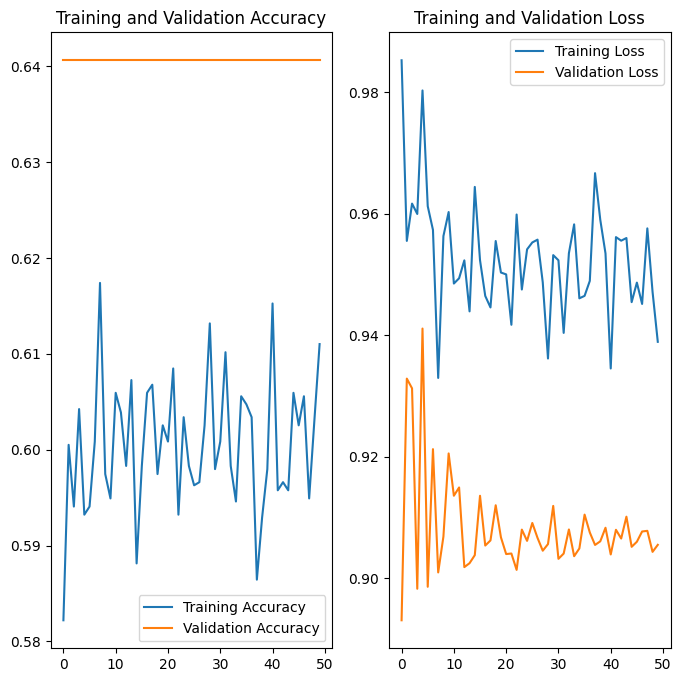

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First Image to Predict
First Image's Actual Label: Train
1/1 [==============================] - 0s 141ms/step
Predicted Label: Train


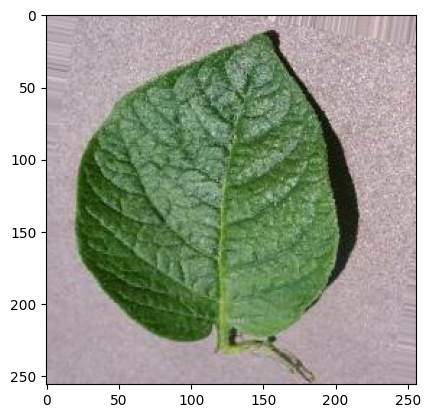

In [40]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("First Image to Predict")
  plt.imshow(first_image)
  print("First Image's Actual Label:", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("Predicted Label:", class_names[np.argmax(batch_prediction[0])])

In [41]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  prediction = model.predict(img_array)

  predicted_class = class_names[np.argmax(prediction[0])]
  confidence = round(100 * (np.max(prediction[0])), 2)
  return predicted_class, confidence

1/1 [==============================] - 0s 22ms/step


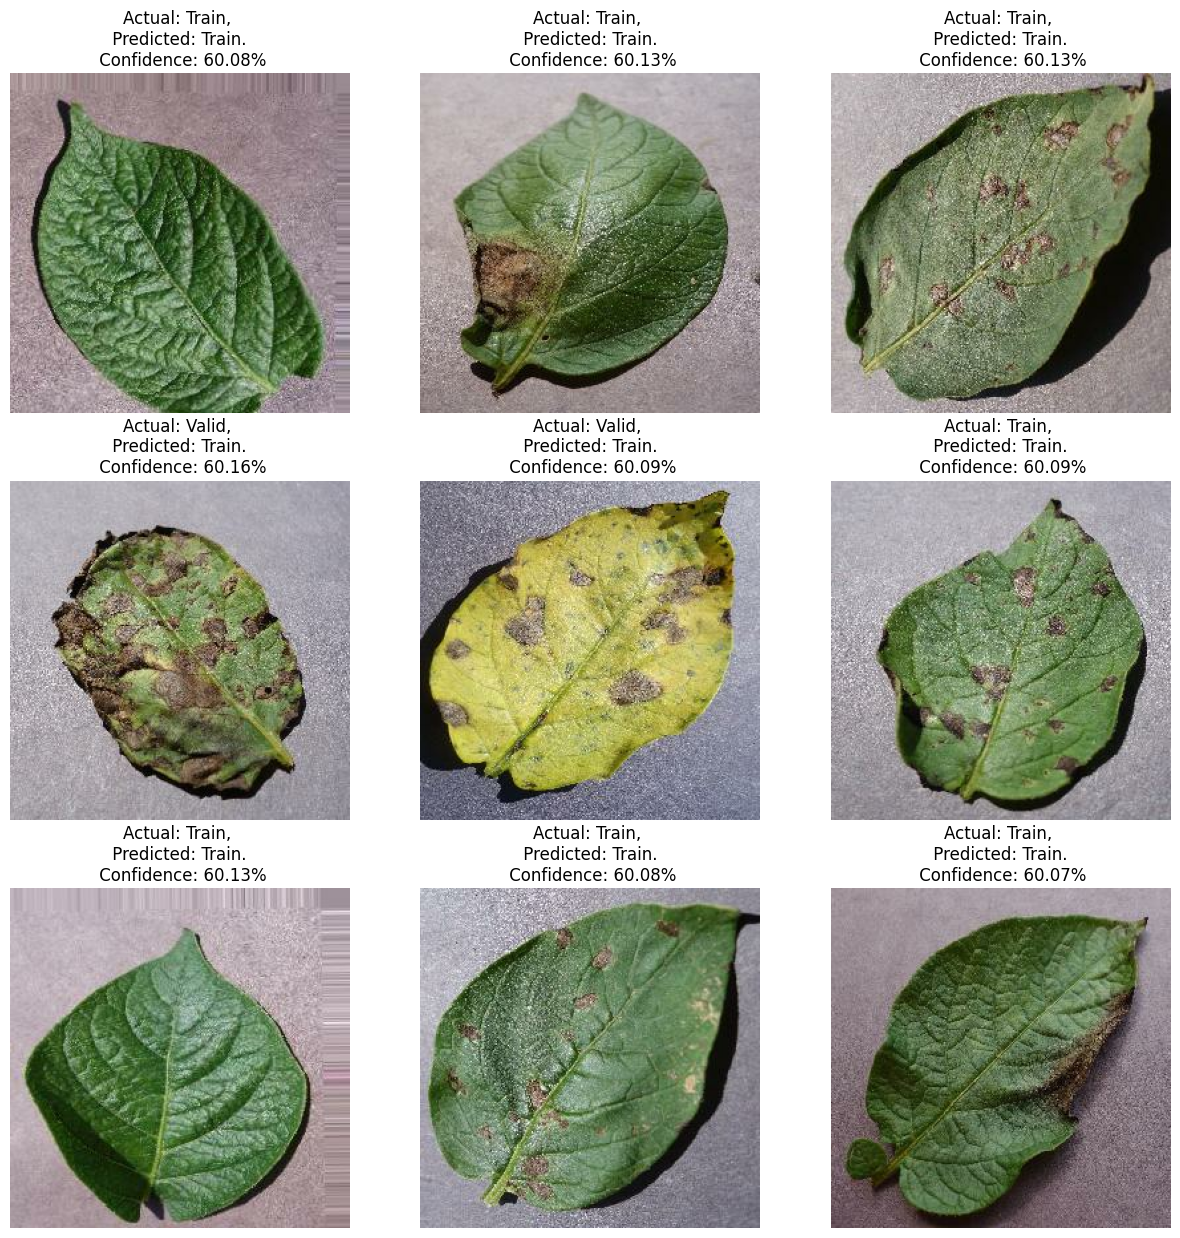

In [42]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")
    plt.axis("off")